# Lab 1 - Corpora and Text Processing

TDT4310, Spring 2022\
Lab date: January 18, 20222\
Prof. Björn Gambäck\
TA. Tollef Jørgensen

Student: Mathias Bjørgum, mathigb

## Instructions

I will include the `.json` files from the parsing. This should make it possible to reproduce the corpus.

This lab uses ``python 3.10.1`` running  in an ``conda`` environment. The following modules will be imported and used:

In [2]:
import nltk
import matplotlib.pyplot as plt
import string
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from dataclasses import dataclass, asdict
from typing import List
import os
import json

# Exercises
## 1 - Managing text and filtering

Using the following words:  
["further", "Forward", "Foreign", "financE", "Forgive", "feature", "federal",
"failurE", "Feeling", "finding", "freedom", "Foundry"]

### a) Print all words beginning with fo

I assume that capital letters should be ingored.

In [2]:
words = ["further", "Forward", "Foreign", "financE", "Forgive", "feature", "federal",
"failurE", "Feeling", "finding", "freedom", "Foundry"]

for word in words:
    if word.lower()[:2] == "fo":
        print(word)

Forward
Foreign
Forgive
Foundry


### b) Print all words ending with e.

I assume that capital letters should be ingored.

In [3]:
for word in words:
    if word.lower()[-1] == "e":
        print(word)

financE
Forgive
feature
failurE


### c) Reflect on how simple techniques like these can bring value to a project.

This techniques are based on simple string managment. It could be used if you want to extract multiple words with the same prefix or suffix. For example if you want to extract words with negative prefixes like anti-, non- etc.

### d) Converting words to lowercase is a frequent process in text cleaning. Can you think of any issues that arise by doing this?

When you convert text to lowercase you loose information if the word is a name. Names are spelled with the first letter in uppercase.

## 2 - Reading a corpus

In NLTK, several corpora are available. Load the Brown corpus and extract data (i.e. words) from at least two categories of your choice (or all). The goal is to find basic trends or identifiers for each category (i.e. spotting differences in the data). Do the following:


### a) Look at the top 5 most common words. Do you notice any similarities? Explain your findings.

Firstly i define a function to be used later:

In [6]:
from typing import List
from nltk.corpus.reader.util import ConcatenatedCorpusView

def get_most_common_words(corpus_wordlist: ConcatenatedCorpusView, number_of_items = 10, stopwords = False, stop_word_list = None) -> List[str]:
    '''
    Returns a list of the `number_of_items` most common words in a given `ConcatenatedCorpusView`

    `stopwords` defaults to False (i.e not including stopwords), and `stop_word_list` defaults to `nltk.corpus.stopwords.words("english")`
    '''

    if stopwords == True:
        return nltk.FreqDist(corpus_wordlist).most_common(number_of_items)
    
    if stop_word_list == None:
        stop_word_list = nltk.corpus.stopwords.words("english")

    wordlist_without_stopwords = [word for word in corpus_wordlist if word.lower() not in stop_word_list]
    return nltk.FreqDist(wordlist_without_stopwords).most_common(number_of_items)

In [47]:
brown = nltk.corpus.brown
punctuation_marks = string.punctuation

print("Most common word in category:")
for category in nltk.corpus.brown.categories():
    words = [word for word in brown.words(categories=category) if word not in punctuation_marks]
    print(f"{category}: {get_most_common_words(words, 5, True)}")

Most common word in category:
adventure: [('the', 3370), ('and', 1622), ('a', 1354), ('of', 1322), ('to', 1309)]
belles_lettres: [('the', 9726), ('of', 6289), ('and', 4282), ('to', 4084), ('a', 3308)]
editorial: [('the', 3508), ('of', 1976), ('to', 1554), ('and', 1302), ('a', 1095)]
fiction: [('the', 3423), ('and', 1696), ('to', 1489), ('of', 1419), ('a', 1281)]
government: [('the', 4143), ('of', 3031), ('and', 1923), ('to', 1829), ('in', 1319)]
hobbies: [('the', 4300), ('of', 2390), ('and', 2144), ('to', 1797), ('a', 1737)]
humor: [('the', 930), ('of', 515), ('and', 512), ('a', 505), ('to', 463)]
learned: [('the', 11079), ('of', 7418), ('and', 4237), ('to', 3882), ('in', 3644)]
lore: [('the', 6328), ('of', 3668), ('and', 2758), ('to', 2530), ('a', 2304)]
mystery: [('the', 2573), ('to', 1284), ('and', 1215), ('a', 1136), ('of', 903)]
news: [('the', 5580), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993)]
religion: [('the', 2295), ('of', 1494), ('and', 921), ('to', 882), ('in', 72

We can see that `NLTK` categorizes  fillerwords like "the", "and, "to", "a" as words. This might not be the behavior we want, since this probably will be the same across multiple corpora. We can see this in action here. The same words are the five most common in most of the categories.

### b) Filter *stopwords* and repeat a). Describe at least two new techniques you would use to further improve the result

In [49]:
stopwords = nltk.corpus.stopwords.words("english")

print("Most common word in category without stopwords:")
for category in nltk.corpus.brown.categories():
    words_with_stopwords = [word for word in brown.words(categories=category) if word not in punctuation_marks]
    print(f"{category}: {get_most_common_words(words_with_stopwords, 5, False, stopwords)}")
    # print(nltk.FreqDist(words).most_common(5))


Most common word in category without stopwords:
adventure: [('``', 998), ("''", 995), ('said', 287), ('--', 213), ('would', 191)]
belles_lettres: [('``', 1320), ("''", 1309), ('one', 475), ('--', 455), ('would', 392)]
editorial: [('``', 396), ("''", 382), ('--', 192), ('would', 180), ('one', 150)]
fiction: [('``', 703), ("''", 698), ('would', 287), ('said', 192), ('--', 176)]
government: [('year', 183), ('States', 162), ('United', 155), ('may', 153), ('--', 139)]
hobbies: [('--', 295), ("''", 261), ('one', 258), ('``', 227), ('may', 131)]
humor: [('``', 343), ("''", 340), ('said', 87), ('--', 67), ('one', 64)]
learned: [('Af', 908), ("''", 591), ('``', 586), ('one', 451), ('--', 335)]
lore: [('``', 727), ("''", 717), ('--', 395), ('one', 290), ('would', 186)]
mystery: [('``', 740), ("''", 738), ('--', 270), ('said', 202), ('would', 186)]
news: [('``', 732), ("''", 702), ('said', 402), ('--', 300), ('Mrs.', 253)]
religion: [('``', 270), ("''", 266), ('God', 131), ('--', 110), ('world', 

Here I have used the `nltk.corpus.stopwords` corpus to filter out stopwords. We can now see that some marks did not get filtered out in task a), i.e "``", "''", "--". This is because it is tokenized as a pair of characters, not as individual ones, like those we filtered in task a). We can also notice that there are many of the same words present in all the categories. Words that might be uneccecary for the analysis also include words like: "said", "may", "one". One solution to this may be to exclude the questionwords, and countingwords.

### c) Implement at least one technique of your choice and repeat a)

To give us a better understanding of the differences i choose to implement filtering of double marks.

In [50]:
print("Most common word in category without stopwords or double marks:")

# Creating a variable to be used in the next task
most_common_words_across_datasets = []

stopwords.append("``")
stopwords.append("--")
stopwords.append("''")
for category in nltk.corpus.brown.categories():
    words_with_stopwords = [word for word in brown.words(categories=category) if word not in punctuation_marks]
    most_common_in_current_category = get_most_common_words(words_with_stopwords, 5, False, stopwords)
    most_common_words_across_datasets.append(most_common_in_current_category)
    print(f"{category}: {most_common_in_current_category}")

Most common word in category without stopwords or double marks:
adventure: [('said', 287), ('would', 191), ('back', 165), ('man', 165), ('one', 162)]
belles_lettres: [('one', 475), ('would', 392), ('time', 225), ('man', 219), ('could', 213)]
editorial: [('would', 180), ('one', 150), ('Mr.', 110), ('new', 80), ('American', 77)]
fiction: [('would', 287), ('said', 192), ('one', 168), ('could', 166), ('like', 147)]
government: [('year', 183), ('States', 162), ('United', 155), ('may', 153), ('would', 120)]
hobbies: [('one', 258), ('may', 131), ('time', 127), ('two', 116), ('first', 114)]
humor: [('said', 87), ('one', 64), ('would', 56), ('time', 43), ('even', 38)]
learned: [('Af', 908), ('one', 451), ('may', 324), ('would', 319), ('1', 241)]
lore: [('one', 290), ('would', 186), ('time', 174), ('may', 165), ('first', 145)]
mystery: [('said', 202), ('would', 186), ('one', 165), ('back', 156), ('could', 141)]
news: [('said', 402), ('Mrs.', 253), ('would', 244), ('one', 184), ('Mr.', 170)]
reli

Here we can see that the questionwords and countingwords are more prominent. "would" and "said" are two words that we see in almost all of the corpora.

### d) Plot a feature you find interesting (e.g. lexical diversity).

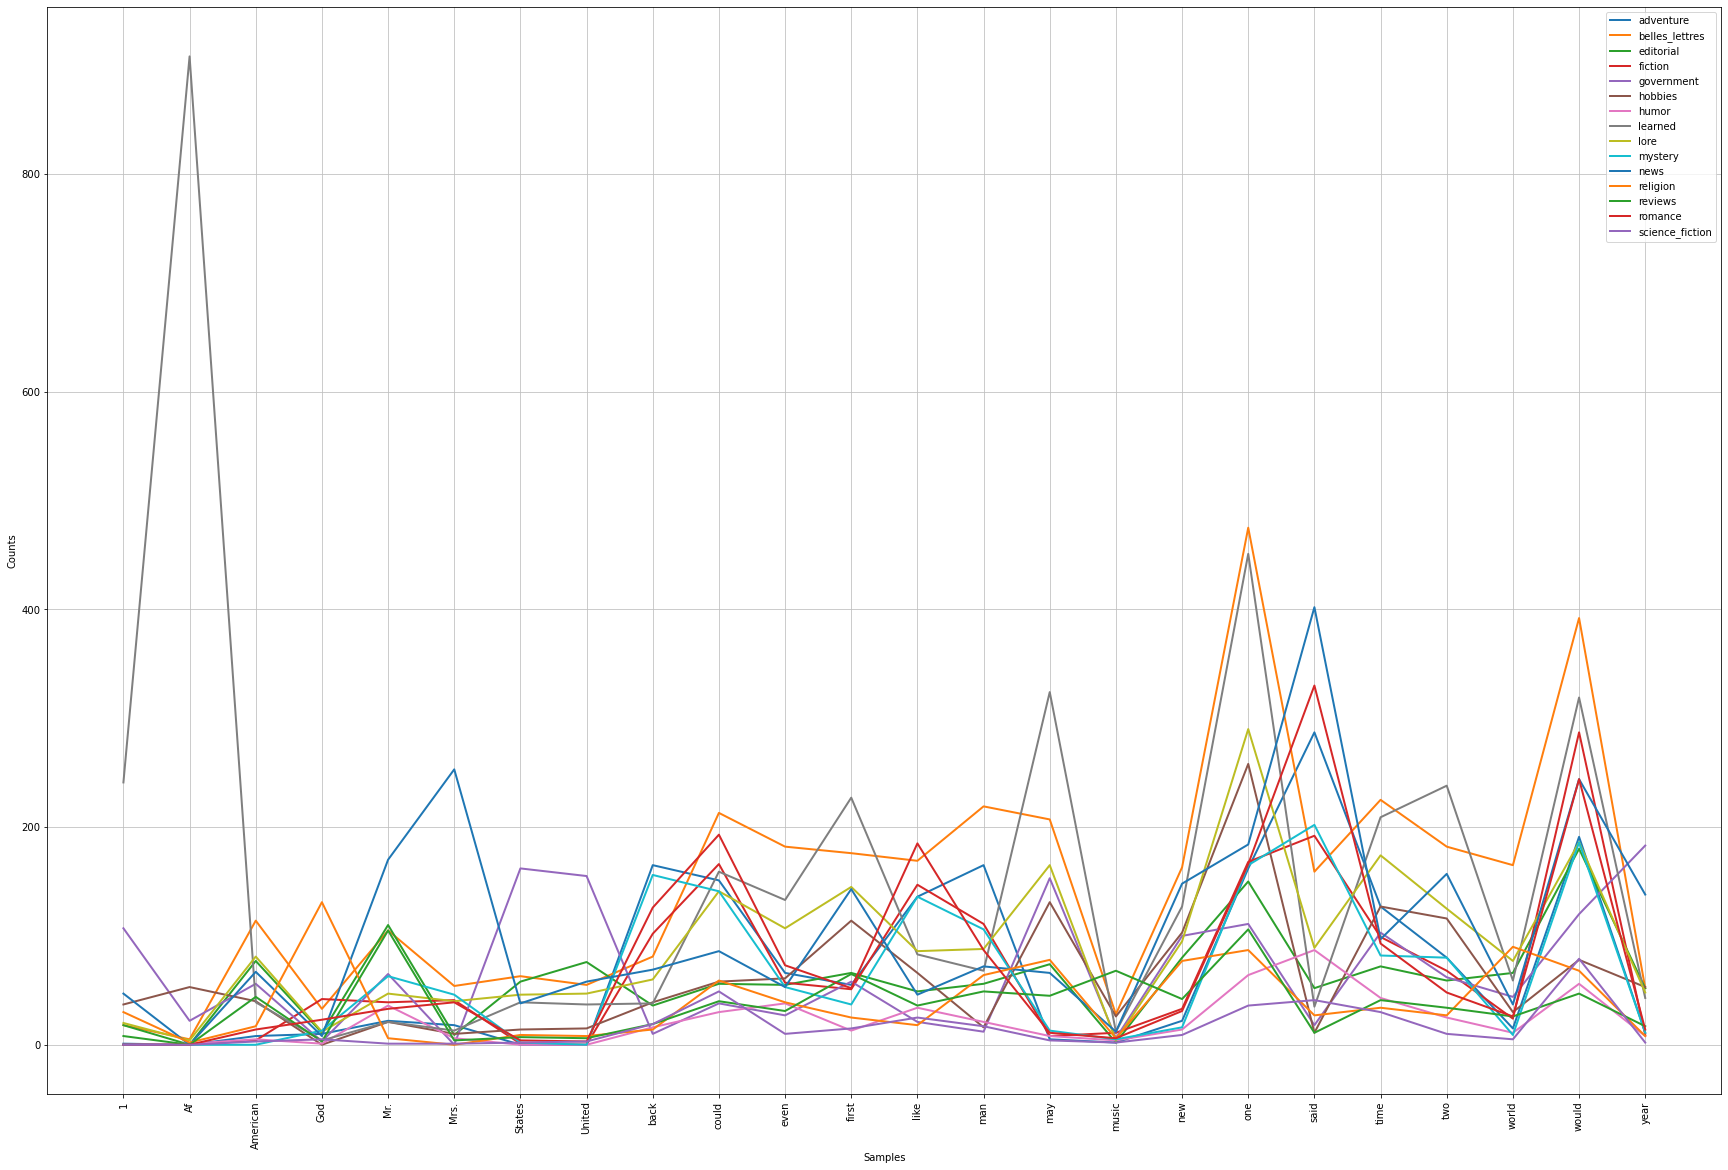

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
# Cleaning the list
all_most_common_words = []
for dataset in most_common_words_across_datasets:
    for word in dataset:
        all_most_common_words.append(word[0])

set_all_most_common_words = []
for word in all_most_common_words:
    if word not in set_all_most_common_words:
        set_all_most_common_words.append(word)

plt.figure(figsize=(30,20))

cfd = nltk.ConditionalFreqDist(
    (category, target)
    for category in nltk.corpus.brown.categories()
    for word in nltk.corpus.brown.words(categories=category)
    for target in set_all_most_common_words
    if word == target

)

cfd.plot()


This plot shows us the count for the most common words across all datasets. One interesting aspect here is that the word "Af" is mentioned over 800 times in the `learned` dataset.

## 3 - Building your own corpus

For building this corpus i will use the norwegian news website https://www.nrk.no/. The code can be executed from top to bottom.

In [8]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.nrk.no/")

content = driver.page_source
soup = BeautifulSoup(driver.page_source, features="html.parser")

driver.quit()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\mathi\.wdm\drivers\chromedriver\win32\97.0.4692.71]
C:\Users\mathi\AppData\Local\Temp\ipykernel_24004\3431681869.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


I am using the code below to extract all url adresses from the front page to the articles.

In [9]:
article_urls_uncleaned = [article.contents[1].get("href") for article in soup.find_all(attrs={"class": "kur-room"})]

article_urls = []
for url in article_urls_uncleaned:

    if url != None:
        if "https://radio.nrk.no/" in url:
            continue
        if "p3.no" in url:
            continue
        if "tv.nrk.no" in url:
            continue
        if "nrkbeta.no" in url:
            continue
        article_urls.append(url)

For the next part i will create a `dataclass` to store the information i need.

In [12]:
from dataclasses import dataclass, asdict

@dataclass(repr=False)
class Article:
    headline: str
    ingress: str
    published_date: str
    url: str
    text_body: str
    topic: str = "None"

    def __repr__(self) -> str:
        big_string = "url: \n"
        big_string += self.url
        big_string += "headline: \n"
        big_string += self.headline
        big_string += "\npublished_date\n"
        big_string += self.published_date
        big_string += "\ningress:\n"
        big_string += self.ingress
        big_string += "\narticle:\n"
        big_string += self.text_body
        return big_string

I need to create a function that pareses the requiered data.

In [11]:
from typing import List

def parse_articles(article_urls: List[str]) -> List[Article]:
    driver = webdriver.Chrome(ChromeDriverManager().install())
    parsed_articles = []
    for url in article_urls:
        driver.get(url)
        content = driver.page_source
        soup = BeautifulSoup(driver.page_source, features="html.parser")

        if "newsroom" in soup.html["class"]:
            continue

        headline = soup.head.title.text

        try:
            ingress = soup.head.find(attrs={"name": "description"}).get("content")
        except:
            ingress = "N/A"

        try:
            date_published = soup.find(attrs={"class": "datePublished"}).get("datetime")
        except: 
            date_published = "N/A"

        all_text_body = ""
        main_body = soup.find_all("div",attrs={"class": "text-body"})
        for paragraph in main_body:
            all_text_body += paragraph.text.strip()

        topic = url.split("/")[3]
        
        article = Article(headline=headline,
                                        ingress=ingress, 
                                        published_date=date_published,
                                        url=url,
                                        text_body=all_text_body,
                                        topic=topic
                                        )
        parsed_articles.append(article)


    driver.quit()
    return parsed_articles

In [15]:
import os
import json
from typing import List
from datetime import datetime

def save_articles(articles: List[Article]):
    now = datetime.now()
    file_name = f"articles_{now.date()}_{now.time()}"[:-10]
    file_name += ".json"
    file_name = file_name.replace(":", "-")
    print(file_name)
    article_dict = [asdict(article) for article in articles]
    path = os.getcwd()
    with open(os.path.join(path, str(file_name)), "w") as f:
        print(f)
        dumping = json.dump(article_dict, fp=f)

def load_articles(file_name: str) -> List[Article]:
    path = os.getcwd()
    with open(os.path.join(path, file_name), "r") as f:
        articles = json.load(f)
    list_of_articles = []
    for i, el in enumerate(articles):
        article = Article(el["headline"], el["ingress"], el["published_date"], el["url"], el["text_body"], el["topic"])
        list_of_articles.append(article)
    return list_of_articles

Parsing articles:

In [13]:
parsed = parse_articles(article_urls)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\mathi\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache
C:\Users\mathi\AppData\Local\Temp\ipykernel_24004\3096659787.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [14]:
save_articles(parsed)

articles_2022-01-31_10-16.json
<_io.TextIOWrapper name='c:\\Users\\mathi\\OneDrive - NTNU\\Skole\\Master\\TDT4310\\Labs\\Lab 1\\Exercises\\articles_2022-01-31_10-16.json' mode='w' encoding='cp1252'>


In [15]:
loaded_articles = load_articles("articles_2022-01-31_10-16.json")

Now that i have extracted the data from the website, and stored it as a `.json` file i can continue on the tasks.

#### a) Build the corpus. Chapter 2, section 1.9 (NLTK) and Chapter 2 (ATAP) explain of how this can be done using NLTK (e.g., using a custom HTMLCorpusReader), but you are free to load the text as you prefer. As long as the code is readable!


In [16]:
possible_topics = []
for element in loaded_articles:
    possible_topics.append(element.topic)


In [17]:

cwd = os.getcwd()
try:
    os.mkdir(os.path.join(cwd, "corpus"))
except:
    print("Corpus dir alredy exists")

for category in set(possible_topics):
    cwd = os.getcwd()
    corpus_root = os.path.join(cwd, "corpus")   
    try:
        os.mkdir(os.path.join(corpus_root, category))
    except:
        print(f"dir for cat: {category} alredy exists")


dir for cat: trondelag alredy exists
dir for cat: sport alredy exists
dir for cat: norge alredy exists
dir for cat: vestfoldogtelemark alredy exists
dir for cat: osloogviken alredy exists
dir for cat: dokumentar alredy exists
dir for cat: anmeldelser alredy exists
dir for cat: ytring alredy exists
dir for cat: innlandet alredy exists
dir for cat: mat alredy exists
dir for cat: tromsogfinnmark alredy exists
dir for cat: urix alredy exists
dir for cat: kultur alredy exists
dir for cat: nordland alredy exists
dir for cat: vestland alredy exists


I construct a string representation of the article.

In [18]:
def create_text_file(article: Article) -> string:
    '''Creates a string representation of an Article'''
    big_string = "url: \n"
    big_string += article.url
    big_string += "headline: \n"
    big_string += article.headline
    big_string += "\npublished_date\n"
    big_string += article.published_date
    big_string += "\ningress:\n"
    big_string += article.ingress
    big_string += "\narticle:\n"
    big_string += article.text_body
    return big_string


In [19]:

for category in set(possible_topics):
    cwd = os.getcwd()
    corpus_path = os.path.join(cwd, "corpus")   
    selected_category_path = os.path.join(corpus_path, category)
    for article in parsed:
        if article.topic == category:
            try:
                with open(os.path.join(selected_category_path, article.headline + ".txt"), "w",  encoding="utf-8") as f:
                    
                    f.write(create_text_file(article))
            except:
                continue

I have now created a corpus with each category as a folder.

Next i will write a corpus reader.

In [3]:
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader

DOC_PATTERN = r'.*\.txt'
CAT_PATTERN = r'(\w+)/*'

corpus_root = os.path.join(os.getcwd(), "corpus")

corpus = CategorizedPlaintextCorpusReader(
   corpus_root, DOC_PATTERN, cat_pattern=CAT_PATTERN
)


The corpusreader now reads the filestructure into a categorized corpus.

#### b) Clean the data using what you have just learned. There are likely several new problems to handle. Select one and explain how you would solve it – no need for code

By going through the different categories we kan see that there are some problems related to this corpus. Firstly, there are some categories with few observations. This is because the news website is not consistent in the way they mark the HTML documents.

I think my files could be a bit better. I have included things in the file that is not pure text, like the url. This means that the `CategorizedPlaintextCorpusReader` thinks those are actual words. I cannot think of a easy way to do this without rewriting how the files gets saved.

#### c) Separate the text body (sentences) into tokens (words) by splitting on spaces. Find and implement one improvement on this tokenization process.

Using the corpusReader defined in the previous code block i can easily access the `corpus.words()` and `corpus.sents()` to get tokenized sentences and words.

In [4]:
words = corpus.words()
sents = corpus.sents()

#### d) Print the 10 most common words
 
We can see that we have some stopwords and words that are not that interesting here. I choose to create a new list of the most common words, without stopwords. The stopwords i take into consideration are the ones found here: `https://gist.github.com/kmelve/8869818` 

In [7]:
punctuation_marks = string.punctuation

for category in corpus.categories():
    words = [word for word in corpus.words(categories=category) if word not in punctuation_marks]
    print(f"{category}: {get_most_common_words(words, 10, True)}")

dokumentar: [('i', 284), ('og', 175), ('til', 164), ('er', 163), ('–', 131), ('på', 124), ('det', 123), ('en', 121), ('har', 121), ('som', 115)]
innlandet: [('i', 254), ('og', 173), ('er', 146), ('som', 120), ('på', 113), ('det', 106), ('til', 103), ('av', 94), ('å', 88), ('at', 87)]
kultur: [('i', 462), ('og', 328), ('er', 263), ('på', 237), ('det', 236), ('av', 221), ('som', 200), ('å', 195), ('til', 187), ('«', 153)]
mat: [('og', 156), ('i', 119), ('en', 78), ('på', 66), ('med', 66), ('du', 53), ('til', 45), ('er', 42), ('det', 38), ('å', 34)]
mr: [('på', 20), ('og', 18), ('av', 17), ('til', 14), ('det', 13), ('å', 13), ('er', 12), ('for', 11), ('som', 11), ('at', 11)]
nordland: [('i', 368), ('er', 304), ('og', 290), ('det', 212), ('som', 209), ('å', 194), ('på', 192), ('til', 188), ('–', 182), ('at', 171)]
norge: [('i', 486), ('og', 418), ('er', 398), ('på', 335), ('å', 322), ('det', 290), ('som', 288), ('til', 286), ('av', 282), ('at', 277)]
osloogviken: [('i', 296), ('og', 238), 

Here we have a lot of stopwords, in the code below we look at the most common words without stopwords.

Output:
```
dokumentar: [('i', 284), ('og', 175), ('til', 164), ('er', 163), ('–', 131), ('på', 124), ('det', 123), ('en', 121), ('har', 121), ('som', 115)]
innlandet: [('i', 254), ('og', 173), ('er', 146), ('som', 120), ('på', 113), ('det', 106), ('til', 103), ('av', 94), ('å', 88), ('at', 87)]
kultur: [('i', 462), ('og', 328), ('er', 263), ('på', 237), ('det', 236), ('av', 221), ('som', 200), ('å', 195), ('til', 187), ('«', 153)]
mat: [('og', 156), ('i', 119), ('en', 78), ('på', 66), ('med', 66), ('du', 53), ('til', 45), ('er', 42), ('det', 38), ('å', 34)]
mr: [('på', 20), ('og', 18), ('av', 17), ('til', 14), ('det', 13), ('å', 13), ('er', 12), ('for', 11), ('som', 11), ('at', 11)]
nordland: [('i', 368), ('er', 304), ('og', 290), ('det', 212), ('som', 209), ('å', 194), ('på', 192), ('til', 188), ('–', 182), ('at', 171)]
norge: [('i', 486), ('og', 418), ('er', 398), ('på', 335), ('å', 322), ('det', 290), ('som', 288), ('til', 286), ('av', 282), ('at', 277)]
osloogviken: [('i', 296), ('og', 238), ('er', 209), ('–', 179), ('å', 174), ('det', 170), ('har', 165), ('på', 159), ('en', 154), ('for', 148)]
rogaland: [('i', 69), ('og', 64), ('er', 63), ('på', 61), ('det', 56), ('som', 46), ('–', 42), ('at', 40), ('for', 35), ('til', 31)]
sorlandet: [('i', 86), ('er', 67), ('på', 60), ('og', 53), ('–', 46), ('har', 41), ('for', 39), ('det', 37), ('å', 34), ('som', 29)]
spesial: [('url', 1), ('https', 1), ('://', 1), ('www', 1), ('nrk', 1), ('no', 1), ('spesial', 1), ('lyspunkt', 1), ('headline', 1), ('NRK', 1)]
sport: [('–', 692), ('i', 607), ('og', 381), ('er', 340), ('på', 328), ('til', 252), ('å', 230), ('det', 220), ('for', 204), ('en', 203)]
tromsogfinnmark: [('er', 183), ('i', 177), ('og', 176), ('det', 154), ('på', 124), ('å', 116), ('til', 110), ('har', 107), ('–', 92), ('for', 91)]
trondelag: [('i', 386), ('er', 328), ('og', 319), ('det', 230), ('å', 223), ('på', 210), ('at', 209), ('–', 207), ('som', 205), ('for', 189)]
urix: [('i', 591), ('og', 421), ('til', 278), ('er', 273), ('på', 233), ('at', 231), ('som', 221), ('å', 218), ('det', 199), ('av', 198)]
vestfoldogtelemark: [('i', 59), ('og', 41), ('er', 40), ('på', 39), ('for', 38), ('at', 36), ('–', 33), ('å', 29), ('ikke', 27), ('av', 26)]
vestland: [('i', 426), ('er', 354), ('og', 339), ('til', 237), ('på', 216), ('det', 215), ('som', 211), ('at', 203), ('har', 201), ('for', 185)]
ytring: [('på', 201), ('i', 182), ('og', 164), ('er', 125), ('av', 104), ('som', 87), ('en', 83), ('omkom', 78), ('å', 76), ('med', 75)]
```

In [8]:
stopwords_no = (
'''
å
alle
andre
at
av
både
båe
bare
begge
ble
blei
bli
blir
blitt
bort
bra
bruke
da
då
de
deg
dei
deim
deira
deires
dem
den
denne
der
dere
deres
det
dette
di
din
disse
dit
ditt
du
dykk
dykkar
eg
ein
eit
eitt
eller
elles
en
ene
eneste
enhver
enn
er
et
ett
etter
få
for
før
fordi
forsøke
først
fra
fram
gå
gjorde
gjøre
god
ha
hadde
han
hans
har
hennar
henne
hennes
her
hit
hjå
ho
hoe
honom
hoss
hossen
hun
hva
hvem
hver
hvilke
hvilken
hvis
hvor
hvordan
hvorfor
i
ikke
ikkje
ingen
ingi
inkje
inn
innen
inni
ja
jeg
kan
kom
korleis
korso
kun
kunne
kva
kvar
kvarhelst
kven
kvi
kvifor
lage
lang
lik
like
må
man
mange
måte
me
med
medan
meg
meget
mellom
men
mens
mer
mest
mi
min
mine
mitt
mot
mye
mykje
nå
når
ned
nei
no
noe
noen
noka
noko
nokon
nokor
nokre
ny
og
også
om
opp
oss
over
på
rett
riktig
så
samme
sånn
seg
selv
si
sia
sidan
siden
sin
sine
sist
sitt
sjøl
skal
skulle
slik
slutt
so
som
somme
somt
start
stille
tid
til
tilbake
um
under
upp
ut
uten
være
vært
var
vår
vart
varte
ved
verdi
vere
verte
vi
vil
ville
vite
vore
vors
vort
'''
).split()

In [9]:
stopwords_no.append("–")
stopwords_no.append("»")
stopwords_no.append("«")

print("Most common word in category without stopwords:")
for category in corpus.categories():
    words_with_stopwords = [word for word in corpus.words(categories=category) if word not in punctuation_marks]
    print(f"{category}: {get_most_common_words(words_with_stopwords, 10, False, stopwords_no)}")

Most common word in category without stopwords:
dokumentar: [('Treholt', 58), ('Kina', 58), ('Barbara', 57), ('laks', 47), ('Vietnam', 47), ('FBI', 44), ('norske', 43), ('Arne', 36), ('sier', 34), ('norsk', 33)]
innlandet: [('Siri', 47), ('NRK', 41), ('sier', 35), ('Foto', 35), ('Hamar', 25), ('brannen', 23), ('Innlandet', 21), ('Sunde', 20), ('01', 19), ('kyrkja', 18)]
kultur: [('Foto', 58), ('NRK', 53), ('NFT', 39), ('Honningbarna', 37), ('2022', 37), ('».', 34), ('Stavanger', 32), ('to', 27), ('frå', 26), ('år', 25)]
mat: [('deigen', 26), ('minutter', 24), ('litt', 15), ('ovnen', 14), ('vann', 13), ('cirka', 13), ('1', 11), ('salt', 11), ('sammen', 11), ('brødet', 11)]
mr: [('bilde', 10), ('Snapchat', 7), ('seier', 7), ('ei', 6), ('bygde', 4), ('frå', 4), ('NRK', 4), ('tilsette', 4), ('kommunen', 4), ('heller', 4)]
nordland: [('sier', 68), ('NRK', 38), ('Foto', 33), ('Norge', 31), ('Nordland', 28), ('01', 26), ('kommer', 26), ('kroner', 25), ('vann', 24), ('1', 23)]
norge: [('sier',

Output:
```
Most common word in category without stopwords:
dokumentar: [('Treholt', 58), ('Kina', 58), ('Barbara', 57), ('laks', 47), ('Vietnam', 47), ('FBI', 44), ('norske', 43), ('Arne', 36), ('sier', 34), ('norsk', 33)]
innlandet: [('Siri', 47), ('NRK', 41), ('sier', 35), ('Foto', 35), ('Hamar', 25), ('brannen', 23), ('Innlandet', 21), ('Sunde', 20), ('01', 19), ('kyrkja', 18)]
kultur: [('Foto', 58), ('NRK', 53), ('NFT', 39), ('Honningbarna', 37), ('2022', 37), ('».', 34), ('Stavanger', 32), ('to', 27), ('frå', 26), ('år', 25)]
mat: [('deigen', 26), ('minutter', 24), ('litt', 15), ('ovnen', 14), ('vann', 13), ('cirka', 13), ('1', 11), ('salt', 11), ('sammen', 11), ('brødet', 11)]
mr: [('bilde', 10), ('Snapchat', 7), ('seier', 7), ('ei', 6), ('bygde', 4), ('frå', 4), ('NRK', 4), ('tilsette', 4), ('kommunen', 4), ('heller', 4)]
nordland: [('sier', 68), ('NRK', 38), ('Foto', 33), ('Norge', 31), ('Nordland', 28), ('01', 26), ('kommer', 26), ('kroner', 25), ('vann', 24), ('1', 23)]
norge: [('sier', 115), ('NRK', 99), ('Norge', 87), ('Foto', 85), ('Taliban', 63), ('Del', 49), ('år', 44), ('smittet', 41), ('folk', 40), ('01', 39)]
osloogviken: [('sier', 90), ('Oslo', 47), ('NRK', 47), ('Foto', 42), ('Viken', 38), ('mener', 37), ('01', 30), ('unge', 21), ('seksuell', 20), ('1', 19)]
rogaland: [('seier', 19), ('Jørpeland', 19), ('NRK', 15), ('kommunen', 14), ('Stålverket', 12), ('kommune', 11), ('Karmøy', 11), ('meiner', 10), ('Foto', 10), ('Næss', 10)]
sorlandet: [('sier', 14), ('jo', 12), ('NRK', 11), ('01', 11), ('seier', 11), ('veldig', 9), ('Sørlandet', 7), ('år', 7), ('Konnestad', 7), ('robotar', 7)]
spesial: [('url', 1), ('https', 1), ('://', 1), ('www', 1), ('nrk', 1), ('spesial', 1), ('lyspunkt', 1), ('headline', 1), ('NRK', 1), ('Lyspunkt', 1)]
sport: [('2022', 110), ('kl', 96), ('sier', 65), ('går', 64), ('januar', 58), ('siste', 56), ('OL', 55), ('Hovland', 51), ('bak', 48), ('NRK', 47)]
tromsogfinnmark: [('sier', 57), ('NRK', 31), ('Foto', 24), ('TikTok', 23), ('hurtigtester', 21), ('flere', 20), ('Finnmark', 18), ('år', 16), ('stengt', 16), ('døgn', 16)]
trondelag: [('sier', 92), ('Foto', 57), ('NRK', 56), ('personar', 41), ('01', 38), ('Trøndelag', 35), ('Norge', 32), ('får', 30), ('mener', 27), ('Inge', 26)]
urix: [('Nato', 85), ('sier', 82), ('USA', 78), ('Russland', 71), ('Taliban', 57), ('NRK', 55), ('Foto', 55), ('Norge', 46), ('Ukraina', 42), ('to', 40)]
vestfoldogtelemark: [('sier', 16), ('Telemark', 11), ('kommunene', 11), ('NRK', 10), ('Foto', 10), ('Vestfold', 8), ('01', 8), ('mener', 8), ('kommuner', 8), ('nok', 7)]
vestland: [('000', 175), ('1', 96), ('seier', 79), ('frå', 49), ('kroner', 48), ('500', 47), ('NRK', 45), ('Norge', 44), ('200', 35), ('ei', 33)]
ytring: [('omkom', 78), ('1', 66), ('falt', 27), ('Ekofisk', 23), ('2', 21), ('sjøen', 20), ('år', 19), ('4', 18), ('truffet', 18), ('november', 16)]
```

#### e) Create bigrams from the texts that do not contain stopwords. Print the 10 most common bigrams

In [10]:
print("Most common bigrams for each category")

for category in corpus.categories():
    words_with_stopwords = [word for word in corpus.words(categories=category) if word not in punctuation_marks]
    words_without_stopwords = [word for word in words_with_stopwords if word.lower() not in stopwords_no]
    bigram = list(nltk.bigrams(words_without_stopwords))
    print(f"{category}: {nltk.FreqDist(bigram).most_common(10)}")
    

Most common bigrams for each category
dokumentar: [(('Arne', 'Treholt'), 27), (('Yimin', 'Dong'), 24), (('New', 'York'), 20), (('norsk', 'laks'), 20), (('Bjørn', 'Olav'), 12), (('Foto', 'Bjørn'), 11), (('Olav', 'Nordahl'), 11), (('Nordahl', 'NRK'), 11), (('laks', 'Vietnam'), 11), (('Kari', 'Storækre'), 8)]
innlandet: [(('Siri', 'Sunde'), 19), (('Jane', 'Victorius'), 12), (('Rosemarie', 'Köhn'), 10), (('url', 'https'), 9), (('https', '://'), 9), (('://', 'www'), 9), (('www', 'nrk'), 9), (('nrk', 'innlandet'), 9), (('published_date', '2022'), 9), (('2022', '01'), 9)]
kultur: [(('2022', 'kl'), 21), (('Maipo', 'Film'), 20), (('Film', 'NRK'), 16), (('Foto', 'Maipo'), 14), (('kl', '10'), 13), (('går', '2022'), 12), (('Oda', 'Gondrosen'), 11), (('Linn', 'Skåber'), 10), (('url', 'https'), 9), (('https', '://'), 9)]
mat: [(('url', 'https'), 8), (('https', '://'), 8), (('://', 'www'), 8), (('www', 'nrk'), 8), (('nrk', 'mat'), 8), (('NRK', 'Mat'), 8), (('Mat', 'Oppskrifter'), 8), (('Oppskrifter',

Output:
```
Most common bigrams for each category
dokumentar: [(('Arne', 'Treholt'), 27), (('Yimin', 'Dong'), 24), (('New', 'York'), 20), (('norsk', 'laks'), 20), (('Bjørn', 'Olav'), 12), (('Foto', 'Bjørn'), 11), (('Olav', 'Nordahl'), 11), (('Nordahl', 'NRK'), 11), (('laks', 'Vietnam'), 11), (('Kari', 'Storækre'), 8)]
innlandet: [(('Siri', 'Sunde'), 19), (('Jane', 'Victorius'), 12), (('Rosemarie', 'Köhn'), 10), (('url', 'https'), 9), (('https', '://'), 9), (('://', 'www'), 9), (('www', 'nrk'), 9), (('nrk', 'innlandet'), 9), (('published_date', '2022'), 9), (('2022', '01'), 9)]
kultur: [(('2022', 'kl'), 21), (('Maipo', 'Film'), 20), (('Film', 'NRK'), 16), (('Foto', 'Maipo'), 14), (('kl', '10'), 13), (('går', '2022'), 12), (('Oda', 'Gondrosen'), 11), (('Linn', 'Skåber'), 10), (('url', 'https'), 9), (('https', '://'), 9)]
mat: [(('url', 'https'), 8), (('https', '://'), 8), (('://', 'www'), 8), (('www', 'nrk'), 8), (('nrk', 'mat'), 8), (('NRK', 'Mat'), 8), (('Mat', 'Oppskrifter'), 8), (('Oppskrifter', 'inspirasjon'), 8), (('inspirasjon', 'published_date'), 8), (('published_date', 'N'), 8)]
mr: [(('psykisk', 'utviklingshemma'), 3), (('Møre', 'Romsdal'), 3), (('jobb', 'psykisk'), 2), (('utviklingshemma', 'fekk'), 2), (('åtvaring', 'frå'), 2), (('Pleiaren', 'tømde'), 2), (('tømde', 'veska'), 2), (('veska', 'dropsesker'), 2), (('dropsesker', 'snusboksar'), 2), (('snusboksar', 'sprit'), 2)]
nordland: [(('NRK', 'Nordland'), 13), (('url', 'https'), 12), (('https', '://'), 12), (('://', 'www'), 12), (('www', 'nrk'), 12), (('nrk', 'nordland'), 12), (('Nordland', 'published_date'), 12), (('published_date', '2022'), 12), (('2022', '01'), 12), (('01', '00'), 12)]
norge: [(('deler', 'landet'), 19), (('url', 'https'), 17), (('https', '://'), 17), (('://', 'www'), 17), (('www', 'nrk'), 17), (('nrk', 'norge'), 17), (('NRK', 'Norge'), 17), (('Norge', 'Oversikt'), 17), (('Oversikt', 'nyheter'), 17), (('nyheter', 'ulike'), 17)]
osloogviken: [(('Oslo', 'Viken'), 15), (('url', 'https'), 14), (('https', '://'), 14), (('://', 'www'), 14), (('www', 'nrk'), 14), (('nrk', 'osloogviken'), 14), (('NRK', 'Oslo'), 14), (('Viken', 'Lokale'), 14), (('Lokale', 'nyheter'), 14), (('nyheter', 'TV'), 14)]
rogaland: [(('Karmøy', 'kommune'), 9), (('Morten', 'Næss'), 8), (('Stålverket', 'Jørpeland'), 5), (('meiner', 'Karmøy'), 4), (('Sverre', 'Solli'), 4), (('url', 'https'), 3), (('https', '://'), 3), (('://', 'www'), 3), (('www', 'nrk'), 3), (('nrk', 'rogaland'), 3)]
sorlandet: [(('url', 'https'), 5), (('https', '://'), 5), (('://', 'www'), 5), (('www', 'nrk'), 5), (('nrk', 'sorlandet'), 5), (('NRK', 'Sørlandet'), 5), (('Sørlandet', 'Lokale'), 5), (('Lokale', 'nyheter'), 5), (('nyheter', 'TV'), 5), (('TV', 'radio'), 5)]
spesial: [(('url', 'https'), 1), (('https', '://'), 1), (('://', 'www'), 1), (('www', 'nrk'), 1), (('nrk', 'spesial'), 1), (('spesial', 'lyspunkt'), 1), (('lyspunkt', 'headline'), 1), (('headline', 'NRK'), 1), (('NRK', 'Lyspunkt'), 1), (('Lyspunkt', 'Spesial'), 1)]
sport: [(('2022', 'kl'), 96), (('går', '2022'), 46), (('januar', '2022'), 42), (('31', 'januar'), 24), (('kl', '13'), 24), (('testet', 'positivt'), 18), (('1', 'runde'), 18), (('kl', '08'), 18), (('25', 'januar'), 17), (('Australian', 'Open'), 15)]
tromsogfinnmark: [(('Troms', 'Finnmark'), 9), (('Hanna', 'Lyrek'), 7), (('politiet', 'Finnmark'), 7), (('url', 'https'), 6), (('https', '://'), 6), (('://', 'www'), 6), (('www', 'nrk'), 6), (('nrk', 'tromsogfinnmark'), 6), (('NRK', 'Troms'), 6), (('Finnmark', 'published_date'), 6)]
trondelag: [(('url', 'https'), 17), (('https', '://'), 17), (('://', 'www'), 17), (('www', 'nrk'), 17), (('nrk', 'trondelag'), 17), (('NRK', 'Trøndelag'), 17), (('Trøndelag', 'published_date'), 17), (('published_date', '2022'), 17), (('2022', '01'), 17), (('01', '00'), 17)]
urix: [(('url', 'https'), 17), (('https', '://'), 17), (('://', 'www'), 17), (('www', 'nrk'), 17), (('nrk', 'urix'), 17), (('NRK', 'Urix'), 17), (('Urix', 'Utenriksnyheter'), 17), (('Utenriksnyheter', 'dokumentarer'), 17), (('dokumentarer', 'published_date'), 17), (('published_date', '2022'), 17)]
vestfoldogtelemark: [(('Vestfold', 'Telemark'), 8), (('url', 'https'), 4), (('https', '://'), 4), (('://', 'www'), 4), (('www', 'nrk'), 4), (('nrk', 'vestfoldogtelemark'), 4), (('500', 'prosent'), 4), (('NRK', 'Vestfold'), 4), (('Telemark', 'Lokale'), 4), (('Lokale', 'nyheter'), 4)]
vestland: [(('500', '000'), 30), (('1', '500'), 26), (('200', '000'), 23), (('000', 'kroner'), 16), (('url', 'https'), 15), (('https', '://'), 15), (('://', 'www'), 15), (('www', 'nrk'), 15), (('nrk', 'vestland'), 15), (('NRK', 'Vestland'), 15)]
ytring: [(('1', 'omkom'), 54), (('Ekofisk', '2'), 12), (('2', '4'), 11), (('beste', 'mening'), 7), (('overlevende', 'etterlatte'), 6), (('Fall', 'lavere'), 6), (('url', 'https'), 5), (('https', '://'), 5), (('://', 'www'), 5), (('www', 'nrk'), 5)]
```

#### f) Find the headline that contains the highest number of most frequently used words (from the common words in task d, but not limited to top 10). If you want to, you are free to explore more advanced techniques if desired, e.g., generating a new headline based on the frequency of words, etc

In this task i assume a given word must be mentioned above above a threshold of times. I choose to set this to the 30 most common words in the whole corpus. In this first example i choose to include the stopwords.

In [13]:
from nltk.tokenize import word_tokenize
from typing import Tuple

def headline_with_most_common_words(articles: List[Article], most_common_words: Tuple[str, int]) -> Tuple[Article, int]:
    '''
    Returns a tuple of `Article` and `int` consisting of the article with the headline consisting of the most common words.
    '''
    current_most_common_article = None
    current_most_common_word_count = 0

    for article in articles:
        headline = word_tokenize(article.headline)
        common_word_count = 0
        for word in headline:
            for common_word in most_common_words:
                if word == common_word[0]:
                    common_word_count += 1

        if common_word_count > current_most_common_word_count:
            current_most_common_article = article
            current_most_common_word_count = common_word_count

    return (current_most_common_article, current_most_common_word_count)
            


In [16]:
words_to_ignore = list(string.punctuation)
words_to_ignore.extend(["–"])

thirty_most_common_words = get_most_common_words(corpus.words(), 30, False, words_to_ignore)
# print(type(thirty_most_common_words))
common_headline = headline_with_most_common_words(articles = load_articles("articles_2022-01-31_10-16.json"), most_common_words=thirty_most_common_words)

print(f"Headline with most common words: {common_headline[0].headline}")
print(f"Number of common words in the headline: {common_headline[1]}")

Headline with most common words: Mange har fått seg hund under pandemien for Aleksander ble hunden som medisin – NRK Oslo og Viken – Lokale nyheter, TV og radio
Number of common words in the headline: 8


Running the code above we can find the article that contains the highest number of commonly used words. Output from the code above while using the articles parsed 31. jan 10:16:

```
Headline with most common words: Mange har fått seg hund under pandemien for Aleksander ble hunden som medisin – NRK Oslo og Viken – Lokale nyheter, TV og radio
Number of common words in the headline: 8
```

## Feedback

Altogether i found this lab exiting and rewarding to work with. I found part 3 a little bit difficult to understand what the different subtasks specifically asked for, but i hope i answered the questions. I might have misunderstood, but in my experience, i did not find the practice for the lab to be that relevant to building the corpus, and therefore i found building the corpus to be difficult.

I should mention that i am not a comp.sci major, but a Business Analytics (Economics) major, so i would greatly appreciate feedback on code layout and structure.